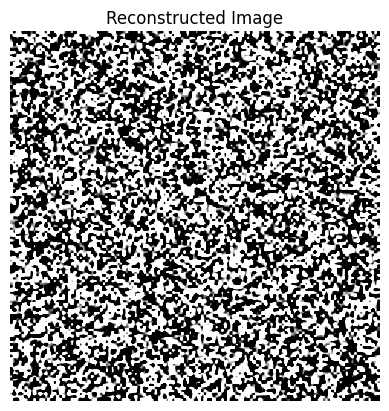

In [17]:
import numpy as np
from scipy.fftpack import idct

def idct2(block):
    """Apply 2D inverse DCT (using orthogonal normalization) to an 8x8 block."""
    return idct(idct(block, axis=0, norm='ortho'), axis=1, norm='ortho')

# Load the coefficients from the text file.
# Make sure the file has exactly 16384 numbers (256 * 64).
dct_coeffs = np.loadtxt('rotated_img.txt')

# Reshape the coefficients into a 4D array with shape (num_blocks_vertical, num_blocks_horizontal, 8, 8).
# For a 128x128 image split into 8x8 blocks, there are 16 blocks along each dimension.
dct_coeffs = dct_coeffs.reshape((16, 16, 8, 8))

# Create an empty array to store the reconstructed image.
reconstructed_image = np.zeros((128, 128))

# Loop through each block, perform the inverse DCT, and place it in the proper location.
for i in range(16):
    for j in range(16):
        block_dct = dct_coeffs[i, j]
        block_spatial = idct2(block_dct)
        reconstructed_image[i*8:(i+1)*8, j*8:(j+1)*8] = block_spatial
        
# Optionally, clip values if necessary (e.g., if working with images in the 0-255 range)
# reconstructed_image = np.clip(reconstructed_image, 0, 255)

# Now you have the reconstructed image in `reconstructed_image`.
# You can visualize it using matplotlib:
import matplotlib.pyplot as plt

plt.imshow(reconstructed_image+128, cmap='gray',vmin=0,vmax=255)
plt.title("Reconstructed Image")
plt.axis('off')
plt.show()


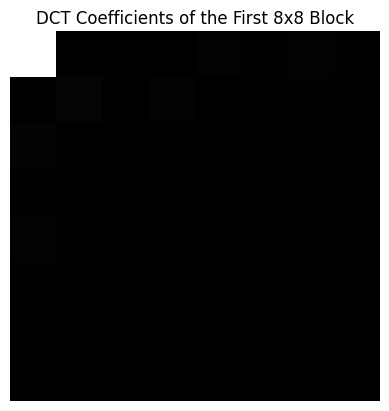

In [6]:
import numpy as np
from scipy.fftpack import dct
from PIL import Image
import matplotlib.pyplot as plt

def dct2(block):
    """Apply 2D DCT with orthogonal normalization on an 8x8 block."""
    return dct(dct(block, axis=0, norm='ortho'), axis=1, norm='ortho')

# Load the image and convert to grayscale
img = Image.open('lenna_128x128.png').convert('L')
img_array = np.array(img)

# Get image dimensions
height, width = img_array.shape

# Ensure dimensions are multiples of 8 (optional: crop or pad if needed)
block_size = 8
num_blocks_vertical = height // block_size
num_blocks_horizontal = width // block_size

# Create an array to hold the DCT coefficients for each block
dct_coeffs = np.zeros((num_blocks_vertical, num_blocks_horizontal, block_size, block_size))

# Process each 8x8 block
for i in range(num_blocks_vertical):
    for j in range(num_blocks_horizontal):
        # Extract the block
        block = img_array[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size]
        # Compute the 2D DCT on the block
        dct_block = dct2(block)
        dct_coeffs[i, j, :, :] = dct_block

# Save the coefficients to a text file.
# Flatten the 4D array to 1D so that it can be easily reloaded later.
np.savetxt('dct_coeffs.txt', dct_coeffs.flatten())

# (Optional) Visualize one block's DCT coefficients for inspection
plt.imshow(dct_coeffs[0, 0], cmap='gray')
plt.title("DCT Coefficients of the First 8x8 Block")
plt.axis('off')
plt.show()
